# Regressão Linear com PyTorch

## Objetivo

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se
- o cálculo do gradiente automático do PyTorch, porém
- a função de perda e
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma camada nn.Linear()

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
from torch.autograd import Variable

torch.manual_seed(1234)

## Leitura dos dados

In [ ]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [ ]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [ ]:
print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train[:5]:
 [[1.        ]
 [0.71428573]
 [0.952381  ]
 [0.28571424]
 [0.7619048 ]]
y_train[:5]:
 [[0.80952376]
 [0.71428573]
 [0.90476197]
 [0.4761905 ]
 [0.7619048 ]]


In [ ]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [ ]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428573],
       [1.        , 0.95238101],
       [1.        , 0.28571424],
       [1.        , 0.76190478],
       [1.        , 0.38095227],
       [1.        , 0.66666675],
       [1.        , 0.        ],
       [1.        , 0.80952376],
       [1.        , 0.14285702],
       [1.        , 0.047619  ],
       [1.        , 0.47619051],
       [1.        , 0.52380949],
       [1.        , 0.57142848],
       [1.        , 0.33333325],
       [1.        , 0.85714275],
       [1.        , 0.33333325],
       [1.        , 0.42857149],
       [1.        , 0.61904752],
       [1.        , 0.33333325],
       [1.        , 0.47619051],
       [1.        , 0.57142848],
       [1.        , 0.66666675],
       [1.        , 0.57142848],
       [1.        , 0.71428573],
       [1.        , 0.80952376],
       [1.        , 0.90476197],
       [1.        , 0.85714275],
       [1.        , 0.52380949],
       [1.        , 0.38095227],
       [1.

In [ ]:
print('x_train_bias.shape:',x_train_bias.shape, x_train_bias.dtype)

x_train_bias.shape: (50, 2) float64


In [ ]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)
print(y_train)

tensor([[0.8095],
        [0.7143],
        [0.9048],
        [0.4762],
        [0.7619],
        [0.7143],
        [0.8095],
        [0.1429],
        [0.7619],
        [0.4286],
        [0.2381],
        [0.5714],
        [0.4762],
        [0.8095],
        [0.2857],
        [0.6667],
        [0.7143],
        [0.5238],
        [0.7143],
        [0.4286],
        [0.8571],
        [0.4762],
        [0.9048],
        [0.8095],
        [0.6190],
        [0.6667],
        [0.8571],
        [0.9524],
        [0.7143],
        [0.2381],
        [0.3810],
        [0.3333],
        [0.4286],
        [1.0000],
        [0.7143],
        [0.7143],
        [0.8095],
        [0.6667],
        [0.5238],
        [0.4762],
        [0.6667],
        [0.7619],
        [0.4762],
        [0.1429],
        [0.5714],
        [0.5714],
        [0.5714],
        [0.6190],
        [0.0000],
        [0.5238]])


## Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

In [ ]:
#Inicialização usando toch.nn.Linear

model = torch.nn.Linear(in_features=2, out_features=1, bias=False)

In [ ]:
model.weight

Parameter containing:
tensor([[-0.6661, -0.1387]], requires_grad=True)

### Verificando a inicialização dos parâmetros

In [ ]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight

<ipython-input-11-4472ed23bcd1>:2: FutureWarning: `nn.init.uniform` is now deprecated in favor of `nn.init.uniform_`.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


Parameter containing:
tensor([[-0.0480, -0.0267]], requires_grad=True)

### Testando o predict da rede

In [ ]:
xx = torch.ones((5,2))
xx

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
model(Variable(xx))

tensor([[-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747]], grad_fn=<MmBackward0>)

## Treinamento

In [ ]:
model.weight.data[0][1]

tensor(-0.0267)

In [ ]:
num_epochs = 100
learning_rate = 0.5
w0_list = []
w1_list = []
w0_list.append(model.weight.data[0][0])
w1_list.append(model.weight.data[0][1])
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    y_pred = model(x_train_bias)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - y_train)**2)

    # backward propagation - cálculo gradient
    loss.backward()

    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data
    w0_list.append(model.weight.data[0][0])
    w1_list.append(model.weight.data[0][1])

    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    if (epoch + 1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch + 1, num_epochs, loss.item()))


Epoch[20/100], loss: 0.022983
Epoch[40/100], loss: 0.021432
Epoch[60/100], loss: 0.021207
Epoch[80/100], loss: 0.021175
Epoch[100/100], loss: 0.021170


In [ ]:
print(w0_list)

[tensor(-0.0480), tensor(0.6132), tensor(0.4314), tensor(0.4656), tensor(0.4452), tensor(0.4392), tensor(0.4302), tensor(0.4224), tensor(0.4147), tensor(0.4075), tensor(0.4006), tensor(0.3940), tensor(0.3878), tensor(0.3818), tensor(0.3761), tensor(0.3707), tensor(0.3656), tensor(0.3607), tensor(0.3560), tensor(0.3515), tensor(0.3473), tensor(0.3432), tensor(0.3393), tensor(0.3357), tensor(0.3322), tensor(0.3288), tensor(0.3256), tensor(0.3226), tensor(0.3197), tensor(0.3170), tensor(0.3143), tensor(0.3118), tensor(0.3095), tensor(0.3072), tensor(0.3050), tensor(0.3030), tensor(0.3010), tensor(0.2991), tensor(0.2974), tensor(0.2957), tensor(0.2940), tensor(0.2925), tensor(0.2910), tensor(0.2896), tensor(0.2883), tensor(0.2870), tensor(0.2858), tensor(0.2847), tensor(0.2836), tensor(0.2825), tensor(0.2815), tensor(0.2806), tensor(0.2797), tensor(0.2788), tensor(0.2780), tensor(0.2772), tensor(0.2764), tensor(0.2757), tensor(0.2750), tensor(0.2744), tensor(0.2738), tensor(0.2732), tensor

## Avaliação

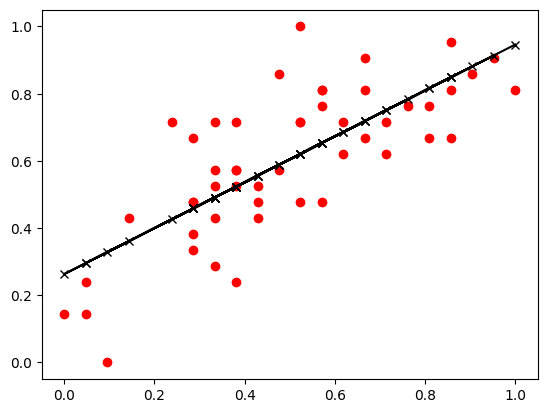

In [ ]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Acessando os parâmetros

In [ ]:
w_dic = model.state_dict()
w_dic

OrderedDict([('weight', tensor([[0.2631, 0.6830]]))])

### Parâmetros ótimos, solução analítica

In [ ]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

tensor([[0.2613, 0.6865]])


# Exercícios

- 1) Por que no final da varredura do laço de treinamento, a perda é impressa utilizando
   `loss.data`? Por que precisa do `data`?
   

Resposta: No PyTorch, .data era usado em versões mais antigas para obter o valor dos tensores sem as informações de gradiente. Ao acessar loss.data, apenas o valor escalar da perda é retornado, e o gradiente não é mantido

- 2) Calcule e imprima o valor da perda (MSE) fazendo o predict da rede com os pesos já
   treinados.

In [ ]:
y_pred_final = model(x_train_bias)
mse_loss = torch.mean((y_pred_final - y_train) ** 2)
print("Mean Squared Error (MSE) com pesos treinados: {:.6f}".format(mse_loss.item()))

Mean Squared Error (MSE) com pesos treinados: 0.021170


- 3) Crie duas listas `w0_list` e `w1_list` para guardar a evolução dos valores dos
   parâmetros durante o laço de treinamento.
   Modifique o exemplo do gráfico tipo **scatter plot** para visualizar a variação
   dos parâmetros do modelo duas dimensões.
   Marque neste gráfico o valor ótimo do parâmetro dado pela solução
   analítica.

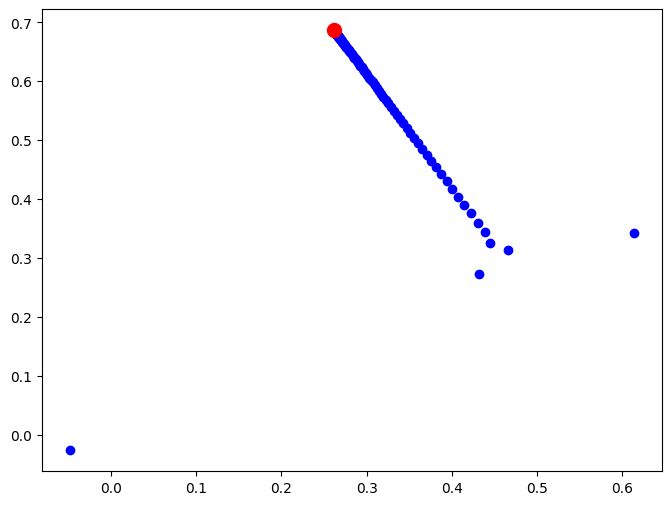

In [ ]:
# Solução analítica para os parâmetros ótimos
x_bias_t = torch.t(x_train_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_train_bias)).mm(x_bias_t)).mm(y_train)
w0_opt, w1_opt = w_opt[0].item(), w_opt[1].item()

# Gráfico de dispersão mostrando a evolução dos parâmetros
plt.figure(figsize=(8, 6))
plt.scatter(w0_list, w1_list, label="Evolução dos parâmetros", color="blue")
plt.scatter(w0_opt, w1_opt, color="red", label="Parâmetro ótimo (Solução Analítica)", s=100)


## Ploting vectors

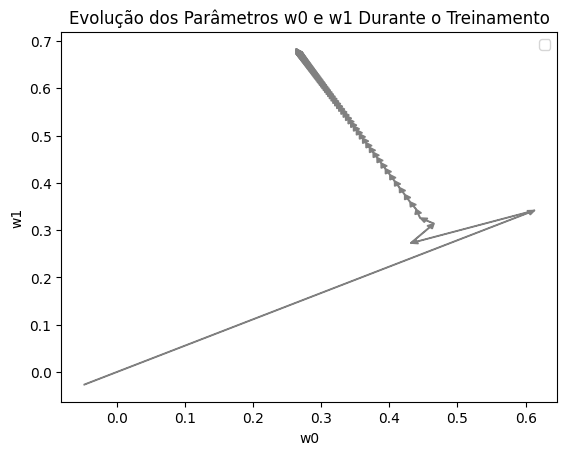

In [ ]:
# Adicionar setas para visualizar a variação dos parâmetros
w0_old, w1_old = None, None
for w0, w1 in zip(w0_list, w1_list):
    if w0_old is not None:
        plt.arrow(w0_old, w1_old, w0 - w0_old, w1 - w1_old,
                  head_length=0.01, head_width=0.01, shape='full',
                  length_includes_head=True, color='grey')
    w0_old, w1_old = w0, w1

plt.xlabel("w0")
plt.ylabel("w1")
plt.legend()
plt.title("Evolução dos Parâmetros w0 e w1 Durante o Treinamento")
plt.show()


# Aprendizados

- Uso do PyTorch para manipulação de tensores, treinamento de modelos e visualização de resultados.